In [36]:
import numpy as np
from matplotlib.pylab import plt 

class BatchNormalization:
    def __init__(self, num_features, epsilon=1e-5, momentum=0.9):
        self.epsilon = epsilon
        self.momentum = momentum
        self.gamma = np.ones(num_features)  # Scaling factor
        self.beta = np.zeros(num_features)   # Shifting factor
        self.running_mean = np.zeros(num_features)
        self.running_variance = np.ones(num_features)
    
    def forward(self, X, training=True):
        if training:
            mean = np.mean(X, axis=0)
            variance = np.var(X, axis=0)
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean
            self.running_variance = self.momentum * self.running_variance + (1 - self.momentum) * variance
            self.X_normalized = (X - mean) / np.sqrt(variance + self.epsilon)
        else:
            self.X_normalized = (X - self.running_mean) / np.sqrt(self.running_variance + self.epsilon)
        out = self.gamma * self.X_normalized + self.beta
        return out



Initialization: The gamma and beta parameters are initialized initially, typically with gamma set to 1 and beta set to 0. These initial values allow the model to learn how much it should scale and shift the normalized activations.

Forward Pass: During the forward pass of each training iteration, the batch normalization layer computes the normalized activations and then applies the scaling factor gamma and shifting factor beta to produce the final normalized outputs.

Backpropagation: During the backpropagation phase, the gradients of the loss with respect to gamma and beta are computed. These gradients are calculated based on how much changes in gamma and beta affect the loss. The gradients are then used to update gamma and beta during the optimization process.

Optimization: The parameters gamma and beta are updated using an optimization algorithm like stochastic gradient descent (SGD) or Adam. The goal is to minimize the loss function, which includes the loss from the main task (e.g., classification) as well as any regularization terms.

By learning the values of gamma and beta, the model can choose to amplify or attenuate the normalized activations, effectively deciding whether to keep the normalized distribution or shift/scale it. This allows the model to adapt to the specific needs of each layer and the overall architecture.

    self.bn = nn.BatchNorm1d(num_features)  # Batch normalization layer


In [33]:
class LayerNormalization:
    def __init__(self, num_features, epsilon=1e-5, momentum=0.9):
        self.epsilon = epsilon
        self.momentum = momentum
        self.gamma = np.ones(num_features)  # Scaling factor
        self.beta = np.zeros(num_features)   # Shifting factor
        self.running_mean = np.zeros(num_features)
        self.running_variance = np.ones(num_features)
    
    def forward(self, X, training=True):
        if training:
            mean = np.mean(X, axis=1, keepdims=True)
            variance = np.var(X, axis=1, keepdims=True)
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean
            self.running_variance = self.momentum * self.running_variance + (1 - self.momentum) * variance
            self.X_normalized = (X - mean) / np.sqrt(variance + self.epsilon)
        else:
            self.X_normalized = (X - self.running_mean) / np.sqrt(self.running_variance + self.epsilon)
        out = self.gamma * self.X_normalized + self.beta
        return out

In [49]:
# Generate a synthetic dataset
# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(500, 100)
num_features = X.shape[1]

# Create an instance of BatchNormalization
batch_norm_layer = BatchNormalization(num_features)

# Apply batch normalization during training
X_b_normalized_training = batch_norm_layer.forward(X, training=True)

# Apply batch normalization during inference
X_b_normalized_inference = batch_norm_layer.forward(X, training=False)


# Create an instance of LayerNormalization
layer_norm = LayerNormalization(num_features)

# Apply layer normalization during training
X_l_normalized_training = layer_norm.forward(X, training=True)

# Apply layer normalization during inference
X_l_normalized_inference = layer_norm.forward(X, training=False)

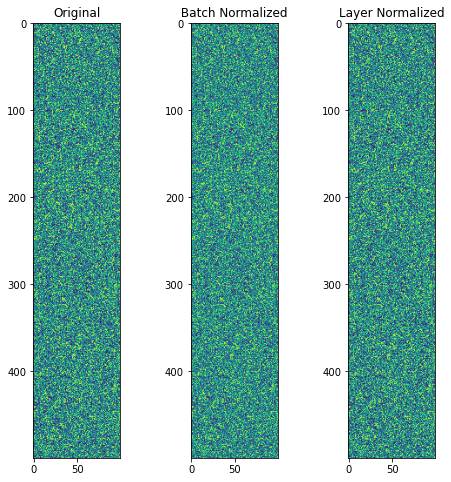

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8))

ax1.imshow(X)
ax1.set_title("Original")

ax2.imshow(X_b_normalized_training)
ax2.set_title(" Batch Normalized ")

ax3.imshow(X_l_normalized_inference)
ax3.set_title("Layer Normalized")

plt.show()

Layer normalization (LN) and batch normalization (BN) are both normalization techniques used in deep learning models to improve training stability and performance. While they serve similar purposes, they operate at different levels and have some differences in their behavior. Here's a comparison between the two:

**1. Normalization Level:**
- **Batch Normalization (BN):** Operates at the batch level, normalizing activations across the batch dimension for each feature independently.
- **Layer Normalization (LN):** Operates at the layer level, normalizing activations across features (units) for each individual data point.

**2. Applicability:**
- **BN:** Effective when mini-batch sizes are relatively large and consistent.
- **LN:** Suitable for cases where mini-batch sizes can be small or vary, such as in recurrent neural networks (RNNs).

**3. Training vs. Inference:**
- **BN:** Uses batch-specific statistics during training and population (cumulative) statistics during inference.
- **LN:** Uses only batch-independent statistics during both training and inference.

**4. Effect on Batch Size:**
- **BN:** The batch size can impact the statistics used for normalization, leading to different behaviors for different batch sizes.
- **LN:** Batch size has less influence on the normalization process since it operates independently on each data point.

**5. Dependence on Batch Size:**
- **BN:** The performance may degrade when batch sizes are small.
- **LN:** More robust to small batch sizes.

**6. Computational Overhead:**
- **BN:** Requires additional computations for calculating batch statistics and maintaining running statistics.
- **LN:** Generally less computationally intensive.

**7. Sequence Length Handling:**
- **BN:** Typically not suitable for sequential models due to its dependence on batch size.
- **LN:** Suitable for sequential models like RNNs, as it works independently on each data point.

**8. Scaling and Shifting:**
- **BN:** Includes learnable scaling (gamma) and shifting (beta) parameters.
- **LN:** Also includes learnable scaling (gamma) and shifting (beta) parameters.

**9. Training Stability:**
- **BN:** Can introduce internal covariate shift issues during training due to changing batch statistics.
- **LN:** Generally more stable as it normalizes each data point independently.

In summary, the choice between batch normalization and layer normalization depends on the architecture of your neural network, the nature of your data, and your specific use case. Batch normalization is commonly used in feedforward networks with large batch sizes, while layer normalization is often preferred for cases involving small batch sizes or sequential models like RNNs.

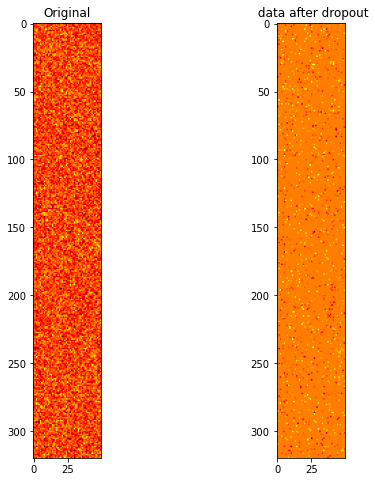

In [66]:
import numpy as np

def dropout(X, dropout_prob):
    mask = (np.random.rand(*X.shape) > dropout_prob) / (1 - dropout_prob)
    dropped_out_X = X * mask
    return dropped_out_X

# Create a synthetic input data
np.random.seed(42)
input_data = np.random.randn(320, 50)  # 32 samples, 10 features

# Dropout probability
dropout_prob = 0.9 # 50% dropout rate

# Apply dropout
dropped_out_input = dropout(input_data, dropout_prob)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))

ax1.imshow(input_data,cmap = 'hot')
ax1.set_title("Original")

ax2.imshow(dropped_out_input ,cmap= 'hot')
ax2.set_title(" data after dropout")

plt.show()

Dropout is a regularization technique that helps prevent overfitting in neural networks by reducing the reliance of the network on any individual neuron. It works by randomly "dropping out" a fraction of neurons during each forward pass of the training process. Here's why dropout helps combat overfitting:

1. **Reduced Co-Adaptation:** Overfitting can occur when neurons in a neural network become highly specialized to certain patterns in the training data, which may not generalize well to new, unseen data. By dropping out neurons randomly, dropout prevents neurons from co-adapting and relying too much on each other. This encourages the network to learn more robust and generalized features.

2. **Ensemble Effect:** Dropout can be seen as training an ensemble of multiple subnetworks, each with a subset of neurons. During each training iteration, a different subset of neurons is active, which creates a diversified set of "experts." These experts are trained to make predictions independently, and their outputs are averaged during inference. This ensemble effect helps improve the generalization of the network.

3. **Smoothing Effect:** Dropout introduces a form of noise into the network during training. This noise helps to prevent the network from fitting the training data too closely and makes it more robust to small variations in the input.

4. **Effective Regularization:** Dropout acts as a form of implicit regularization. Regularization techniques penalize large weights to avoid complex models that may overfit the training data. Dropout effectively regularizes by preventing any single neuron from becoming too dominant, thus preventing complex co-adaptations of weights.

It's important to note that dropout should not be used during inference (testing or prediction) since the network won't see dropout during inference. During inference, the full network is used, and the outputs are not averaged. Dropout is typically used only during training.

While dropout is effective, it's not the only regularization technique available. Techniques like L2 regularization, early stopping, and data augmentation can also help prevent overfitting. The choice of technique(s) depends on the specific problem, dataset, and architecture.

In [76]:
import torch

# Create tensors for inputs and targets
input_data = torch.tensor([[0.1, 0.2], [0.3, 0.4]], dtype=torch.float32, requires_grad=True) # 2x2
target = torch.tensor([[0.5], [0.6]], dtype=torch.float32)

# Initialize learnable parameters (weights and bias)
weights1 = torch.tensor([[0.2, 0.3], [0.4, 0.5], [0.6, 0.7]], dtype=torch.float32, requires_grad=True) # 3x2
weights2 = torch.tensor([[0.8], [0.9],[0.8]], dtype=torch.float32, requires_grad=True)# 3x1
bias1 = torch.tensor([0.1, 0.2, 0.3], dtype=torch.float32, requires_grad=True) #3 
bias2 = torch.tensor([0.4], dtype=torch.float32, requires_grad=True) #1 

# Define learning rate
learning_rate = 0.1

# Training loop
for epoch in range(100):
    # Forward pass
    hidden_layer_input = input_data @ weights1.T + bias1
    hidden_layer_output = torch.relu(hidden_layer_input)
    predicted_output = hidden_layer_output@weights2 + bias2
    
    # Compute loss
    loss = torch.mean((predicted_output - target)**2)
    
    # Backpropagation
    loss.backward()
    
    # Update weights and biases using gradient descent
    with torch.no_grad():
        weights1 -= learning_rate * weights1.grad
        weights2 -= learning_rate * weights2.grad
        bias1 -= learning_rate * bias1.grad
        bias2 -= learning_rate * bias2.grad
        
        # Zero out gradients for the next iteration
        weights1.grad.zero_()
        weights2.grad.zero_()
        bias1.grad.zero_()
        bias2.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Test the trained model
with torch.no_grad():
    test_hidden_input = torch.matmul(torch.tensor([[0.2, 0.3]], dtype=torch.float32), weights1.T) + bias1
    test_hidden_output = torch.relu(test_hidden_input)
    test_predicted_output = torch.matmul(test_hidden_output, weights2) + bias2
    print("Predicted output:", test_predicted_output)


Epoch [1/100], Loss: 0.8862
Epoch [11/100], Loss: 0.0070
Epoch [21/100], Loss: 0.0061
Epoch [31/100], Loss: 0.0054
Epoch [41/100], Loss: 0.0047
Epoch [51/100], Loss: 0.0042
Epoch [61/100], Loss: 0.0037
Epoch [71/100], Loss: 0.0033
Epoch [81/100], Loss: 0.0030
Epoch [91/100], Loss: 0.0027
Predicted output: tensor([[0.5478]])
